<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_CNN_MNIST_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cnn_mnist 모델 로딩

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from tensorflow.keras.models import load_model

dir = "/content/gdrive/My Drive/Colab Notebooks/ai/CNN/"  ### [중요!!] Colab의 경우, 저장할 위치를 기록하시오.
model = load_model(dir + "cnn_mnist.keras")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

이미지를 3채널 또는 1채널로 변환하는 함수

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def jpg_image_to_array(image_path, size):
    image = Image.open(image_path)      # open image
    image = image.resize((size, size))  # resize
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)  # convert to int ndarray
    print(im_arr.shape, '->', end='')
    im_arr = im_arr.reshape((image.size[1], image.size[0], 3)) # reshape to (28, 28, 3)
    print(im_arr.shape)
    im_arr = im_arr*(-1)+255   # convert white background to black background
    return im_arr

def image_array_to_1channel(arr):
    arr_avg = (arr[:,:,0]+arr[:,:,1]+arr[:,:,2])/3   # convert to 1-channel by averaging
    return arr_avg

Google Drive에 저장된 숫자 파일 보여주기

/content/gdrive/My Drive/Colab Notebooks/ai/CNN/MNIST/5/5.jpg
(2352,) ->(28, 28, 3)


<ipython-input-3-bd84f8ce7289>:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)  # convert to int ndarray


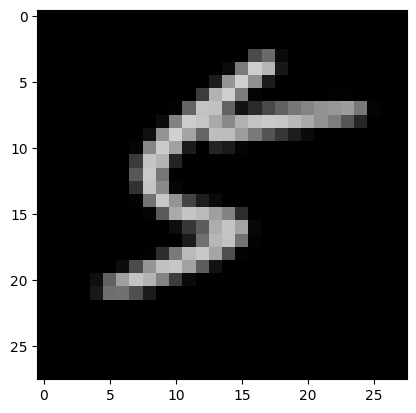

In [4]:
path = dir + "MNIST/5/5.jpg"
print(path)

arr = jpg_image_to_array(path, 28)
plt.imshow(arr, cmap=plt.get_cmap('gray'))

로딩된 모형으로 숫자 파일 예측하기

In [5]:
img_rows, img_cols = 28, 28
arr_1c = image_array_to_1channel(arr)  # convert to 1-channel
print(arr_1c.shape)
x_train = arr_1c.reshape(1, img_rows, img_cols, 1)
print(x_train.shape)

y_out = model.predict(x_train)
y_pred = np.argmax(y_out, axis=-1)
print(y_out, y_pred)

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 131ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] [5]


In [6]:
import os
subdir_names = os.listdir(dir + "MNIST")
X_test = y_test = []
for subdir_name in subdir_names:
    subdir = dir + "MNIST/"+subdir_name
    file_names = os.listdir(subdir)
    for file_name in file_names:
        path = subdir+"/"+file_name
        arr = jpg_image_to_array(path, 28)     # convert to ndarray
        arr_1c = image_array_to_1channel(arr)  # convert to 1-channel
        print(file_name, "=>", arr_1c.shape, "=> ", end='')
        if len(X_test)==0:
            X_test = [arr_1c]
            y_test = int(subdir_name)
            print(subdir_name)
        else:
            X_test = np.concatenate((X_test, [arr_1c]))
            y_test = np.append(y_test, int(subdir_name))
            print(subdir_name)
        print()

(2352,) ->(28, 28, 3)
1.jpg => (28, 28) => 1

(2352,) ->(28, 28, 3)
3.jpg => (28, 28) => 3

(2352,) ->(28, 28, 3)
5.jpg => (28, 28) => 5

(2352,) ->(28, 28, 3)
5_small.jpg => (28, 28) => 5

(2352,) ->(28, 28, 3)
2.jpg => (28, 28) => 2



<ipython-input-3-bd84f8ce7289>:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)  # convert to int ndarray


In [7]:
print(X_test.shape)
X_test = np.expand_dims(X_test, axis=-1)
print(X_test.shape)

(5, 28, 28)
(5, 28, 28, 1)


In [8]:
from tensorflow.keras import utils
y_binary = utils.to_categorical(y_test, 10)
print(y_binary, end='\n\n')

score = model.evaluate(X_test, y_binary)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

1/1 [==============================] - 0s 319ms/step - loss: 0.0000e+00 - accuracy: 1.0000
test_loss:  0.0
test_acc:  1.0


In [9]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)

1/1 [==============================] - 0s 25ms/step
[1 3 5 5 2]
